In [1]:
# from keras.preprocessing import image
import matplotlib.pyplot as plt
% matplotlib inline
import cv2
import numpy as np
import glob
import os


In [ ]:
# training images 
c3_train_dir = '/Users/yueying.teng/Documents/phone_damage/C2_vs_C3/train/C3'
c3_train_img_list = glob.glob(os.path.join(c3_train_dir, '*.JPG'))

c2_train_dir = '/Users/yueying.teng/Documents/phone_damage/C2_vs_C3/train/C2'
c2_train_img_list = glob.glob(os.path.join(c2_train_dir, '*.JPG'))


### color histogram


In [3]:

def show_color_histogram(img):
    for i, col in enumerate(['b', 'g', 'r']):
        color_hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(color_hist, col)
    

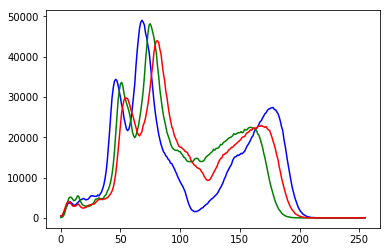

In [4]:
ex = '/Users/yueying.teng/Documents/phone_damage/C2_vs_C3/train/C2/IMG_0327.JPG'
# cv2 uses BGR
img_arr = cv2.imread(ex)
# plt.imshow(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))

show_color_histogram(img_arr)


In [6]:

def draw_img_histogram(img, channels, color = 'k'):
    hist = cv2.calcHist([img], [channels], None, [256], [0, 256])
    plt.plot(hist, color = color)
 

In [7]:
def show_color_histogram_by_channel(img_list, channel, color):
    # opencv uses BGR - [0], [1], [2]
    channel_hist = []
    for i in range(len(img_list)):
        img_arr = cv2.imread(img_list[i])
        hist = draw_img_histogram(img_arr, channel, color)
        channel_hist.append(hist)
    plt.show()
    

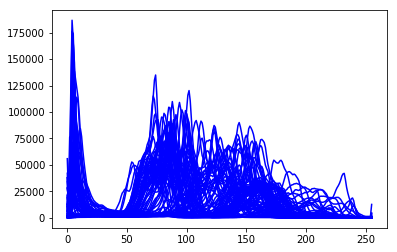

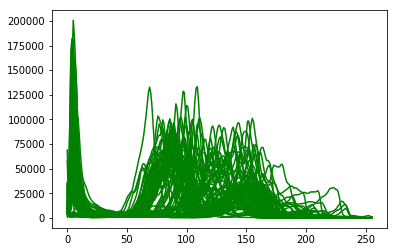

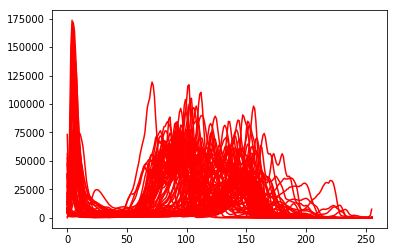

In [8]:
# color histogram of all training images in one class
# c3 - training
for i, color in enumerate(['b', 'g', 'r']):
    show_color_histogram_by_channel(c3_train_img_list, i, color)
    

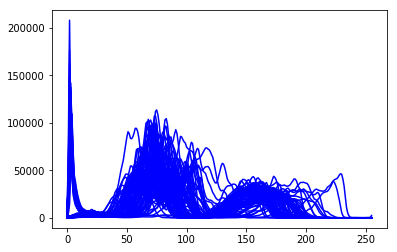

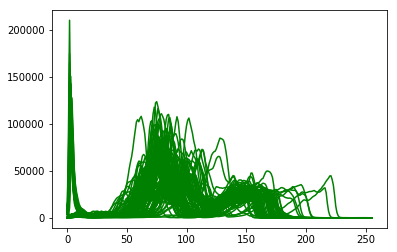

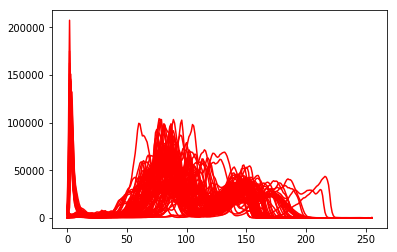

In [9]:
# c2 - training
for i, color in enumerate(['b', 'g', 'r']):
    show_color_histogram_by_channel(c2_train_img_list, i, color)


### histogram equalization


In [10]:
def show_rgb_equalized(img):
    '''
     apply the same process to all the three RGB channels separately 
     and rejoin them together
    '''
    channels = cv2.split(img)
    eq_channels = []
    for ch, color in zip(channels, ['B', 'G', 'R']):
        eq_channels.append(cv2.equalizeHist(ch))
        
    eq_image = cv2.merge(eq_channels)
    eq_image = cv2.cvtColor(eq_image, cv2.COLOR_BGR2RGB)
    
    return eq_image
    

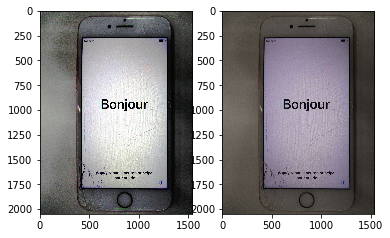

In [11]:
# apply the same process to all three channels 
eq_img = show_rgb_equalized(img_arr)
plt.subplot(1, 2, 1).imshow(eq_img)
plt.subplot(1, 2, 2).imshow(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))


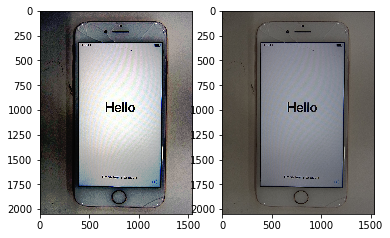

In [18]:
# another example 
ex2 = '/Users/yueying.teng/Documents/phone_damage/C2_vs_C3/train/C2/RIMG0009_1.JPG'
ex2_arr = cv2.imread(ex2)

eq_ex2 = show_rgb_equalized(ex2_arr)
plt.subplot(1, 2, 1).imshow(eq_ex2)
plt.subplot(1, 2, 2).imshow(cv2.cvtColor(ex2_arr, cv2.COLOR_BGR2RGB))


In [33]:
# HSV image - equalization in V channel only

def show_v_equalized(img):
    '''
    img is already np.array 
    only equalize the V channel and merge all three channels after
    '''
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    channels = cv2.split(hsv_img)
    
    eq_channels = []
    for ch, color in zip(channels, ['H', 'S', 'V']):
        if color != 'V':
            eq_channels.append(ch)
        else:
            eq_channels.append(cv2.equalizeHist(ch))
        
    eq_image = cv2.merge(eq_channels)
    eq_image = cv2.cvtColor(eq_image, cv2.COLOR_HSV2RGB)
    
    return eq_image

    

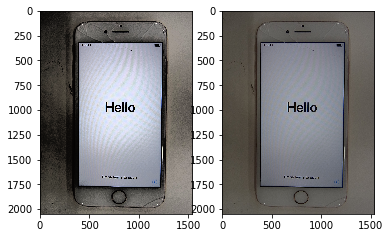

In [43]:
# apply V channel equalization on the second example
v_eq = show_v_equalized(ex2_arr)

plt.subplot(1, 2, 1).imshow(v_eq)
plt.subplot(1, 2, 2).imshow(cv2.cvtColor(ex2_arr, cv2.COLOR_BGR2RGB))


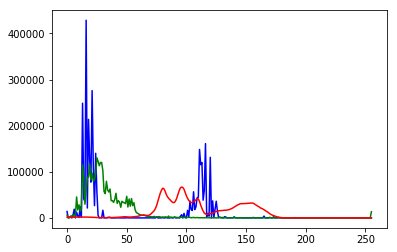

In [41]:
# compare the histogram of pictures being rbg equalized and v equalized - all on HSV scale
# original image 
show_color_histogram(cv2.cvtColor(ex2_arr, cv2.COLOR_BGR2HSV))


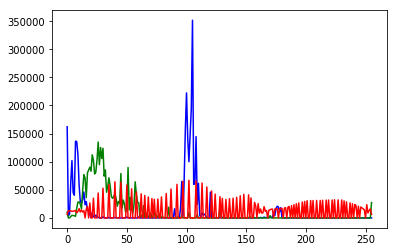

In [44]:
# v channel equalized
show_color_histogram(cv2.cvtColor(v_eq, cv2.COLOR_BGR2HSV))


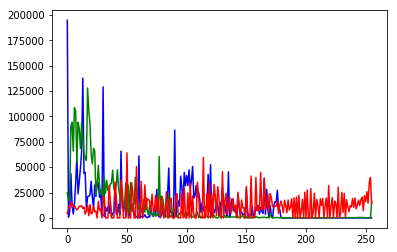

In [46]:
# rgb equalized
show_color_histogram(cv2.cvtColor(eq_ex2, cv2.COLOR_RGB2HSV))
